## Transformation of Features
##### Why Transformation of Features Are Required?

    1. Linear Regression---Gradient Descent ----Global Minima
    2. Algorithms like KNN,K Means,Hierarichal Clustering--- Eucledian Distance

- Every Point has some vectors and Directiom

##### Deep Learning Techniques(Standardization, Scaling)
    1.ANN--->GLobal Minima, Gradient
    2.CNN
    3.RNN
    0-255 pixels
#### Types Of Transformation
    1. Normalization And Standardization
    2. Scaling to Minimum And Maximum values
    3. Scaling To Median And Quantiles
    4. Guassian Transformation
    5. Logarithmic Transformation
    6. Reciprocal Trnasformation
    7. Square Root Transformation 
    8. Exponential Trnasformation
    9. Box Cox Transformation

### Standardization(Why standardization?)
Standardization comes into picture when features of input data set have large differences between their ranges, or simply when they are measured in different measurement units (e.g., Pounds, Meters, Miles … etc).

We try to bring all the variables or features to a similar scale. standarisation means centering the variable at zero. z=(x-x_mean)/std

In [1]:
import pandas as pd
df=pd.read_csv('Titanic.csv', usecols=['Pclass','Age','Fare','Survived'])
df.head()

,Survived,Pclass,Age,Fare
0,0,3,22.0,7.2500
1,1,1,38.0,71.2833
2,1,3,26.0,7.9250
3,1,1,35.0,53.1000
4,0,3,35.0,8.0500


In [2]:
df['Age'].fillna(df.Age.median(),inplace=True)

In [4]:
df.isnull().sum()

Survived    0
Pclass      0
Age         0
Fare        0
dtype: int64

In [5]:
### Independent and dependent features
X=df.iloc[:,1:]
y=df.iloc[:,0]

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.33, random_state=42)

In [13]:
## standarisation: We use the Standardscaler from sklearn library
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
## fit vs fit_transform
X_train_scaled=scaler.fit_transform(X_train)

In [22]:
X_train_scaled

array([[-1.62580285,  1.91349292,  0.38784185],
       [ 0.80576177, -0.09452019, -0.31908053],
       [-0.41002054, -0.32621401,  0.18792449],
       ...,
       [ 0.80576177,  0.90948636, -0.34613654],
       [-1.62580285, -1.17575802,  1.71250117],
       [-1.62580285, -0.63513911,  0.8821286 ]])

In [24]:
## We using transfrom method for test data
X_test_scaled=scaler.transform(X_test)

In [26]:
## Model Building
## fit() for training and predict for test
from sklearn.linear_model import LogisticRegression
classification=LogisticRegression()
classification.fit(X_train_scaled,y_train)

LogisticRegression()

In [27]:
classification.predict(X_test_scaled)

array([0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0], dtype=int64)

### Min Max Scaling (CNN)--Deep Learning Techniques
Min Max Scaling scales the values between 0 to 1. X_scaled = (X - X.min / (X.max - X.min)

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [34]:
from sklearn.preprocessing import MinMaxScaler
min_max=MinMaxScaler()
df_minmax=pd.DataFrame(min_max.fit_transform(X_train),columns=X_train.columns)
df_minmax.head()

,Pclass,Age,Fare
0,0.0,0.673285,0.101229
1,1.0,0.346569,0.030254
2,0.5,0.308872,0.081157
3,1.0,0.321438,0.028213
4,1.0,0.271174,0.020527


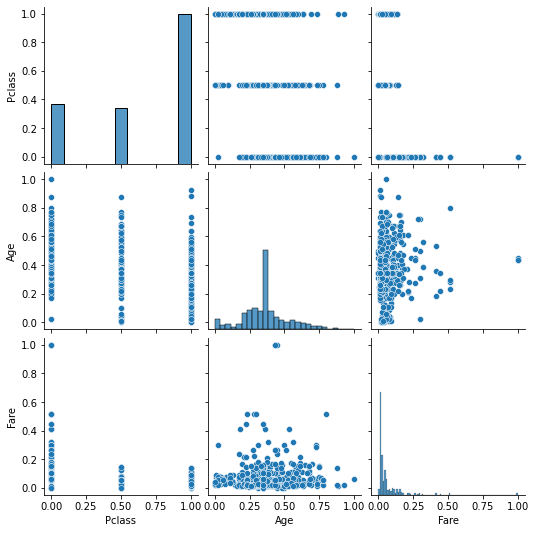

In [37]:
import seaborn as sns
sns.pairplot(df_minmax);

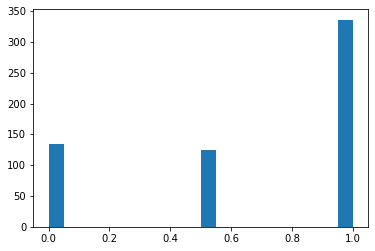

In [40]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.hist(df_minmax['Pclass'],bins=20);

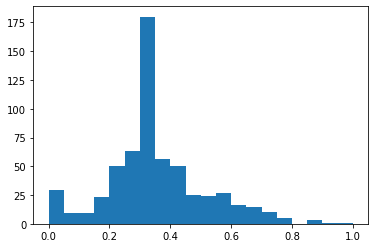

In [42]:
plt.hist(df_minmax['Age'],bins=20);

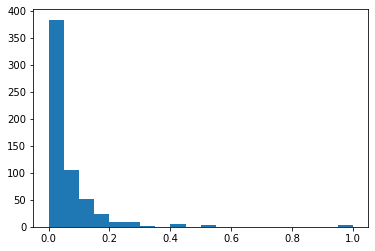

In [43]:
plt.hist(df_minmax['Fare'],bins=20);

## *Robust Scaler*
Robust Scaler are robust to outliers.It is used to scale the feature to median and quantiles Scaling using median and quantiles consists of substracting the median to all the observations, and then dividing by the interquantile difference. The interquantile difference is the difference between the 75th and 25th quantile:

IQR = 75th quantile - 25th quantile

X_scaled = (X - X.median) / IQR

0,1,2,3,4,5,6,7,8,9,10

9-90 percentile---90% of all values in this group is less than 9 1-10 precentile---10% of all values in this group is less than 1 4-40%

In [44]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [45]:
from sklearn.preprocessing import RobustScaler
scaler=RobustScaler()
df_robust_scaler=pd.DataFrame(scaler.fit_transform(X_train),columns=X_train.columns)
df_robust_scaler.head()

,Pclass,Age,Fare
0,-2.0,2.000000,1.602069
1,0.0,0.000000,0.044788
2,-1.0,-0.230769,1.161670
3,0.0,-0.153846,0.000000
4,0.0,-0.461538,-0.168630


In [47]:
X_test_robust_scaled=scaler.transform(X_test)

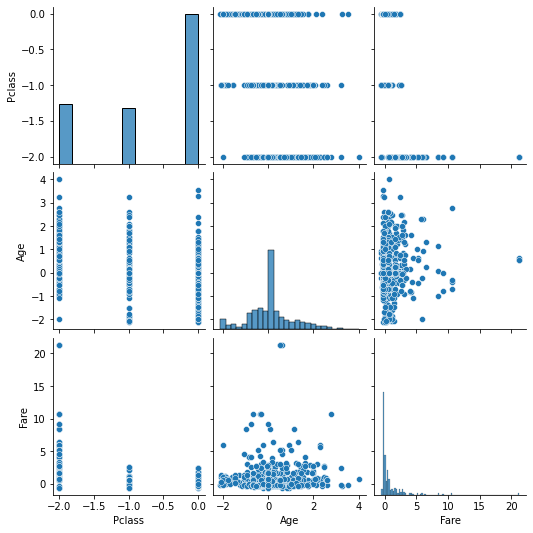

In [48]:
sns.pairplot(df_robust_scaler);

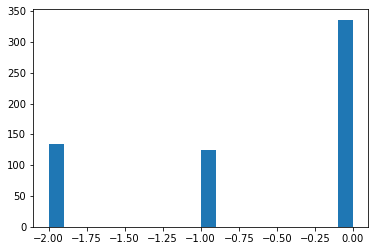

In [50]:
plt.hist(df_robust_scaler['Pclass'],bins=20);

<AxesSubplot:>

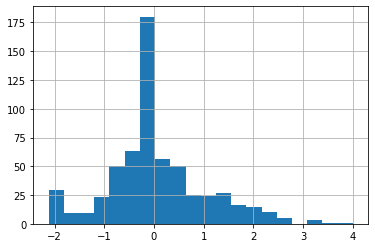

In [49]:
df_robust_scaler['Age'].hist(bins=20)

<AxesSubplot:>

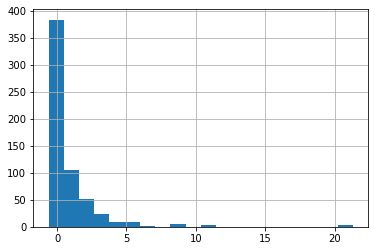

In [51]:
df_robust_scaler['Fare'].hist(bins=20)

### Guassian Transformation
Some machine learning algorithms like linear and logistic assume that the features are normally distributed -Accuracy -Performance

- logarithmic transformation
- reciprocal transformation
- square root transformation
- exponential transformation (more general, you can use any exponent)
- boxcox transformation

In [52]:
df=pd.read_csv('Titanic.csv',usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [53]:
## fillnan
df['Age']=df['Age'].fillna(df['Age'].median())

In [54]:
df.isnull().sum()

Survived    0
Age         0
Fare        0
dtype: int64

In [55]:
import scipy.stats as stat
import pylab

In [56]:
#### If you want to check whether feature is guassian or normal distributed
#### Q-Q plot
def plot_data(df,feature):
    plt.figure(figsize=(10,6))
    plt.subplot(1,2,1)
    df[feature].hist()
    plt.subplot(1,2,2)
    stat.probplot(df[feature],dist='norm',plot=pylab)

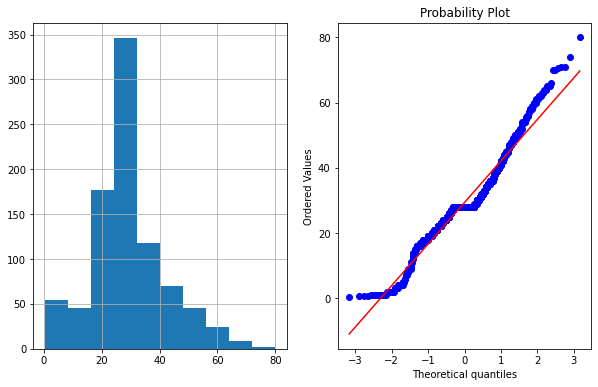

In [57]:
plot_data(df,'Age')

### Logarithmic Transformation

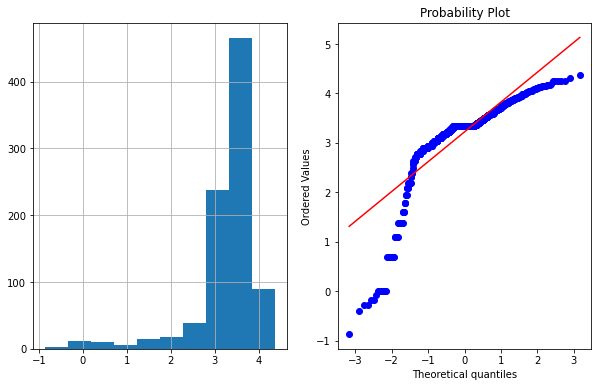

In [59]:
import numpy as np
df['Age_log']=np.log(df['Age'])
plot_data(df,'Age_log')

### Reciprocal Trnasformation

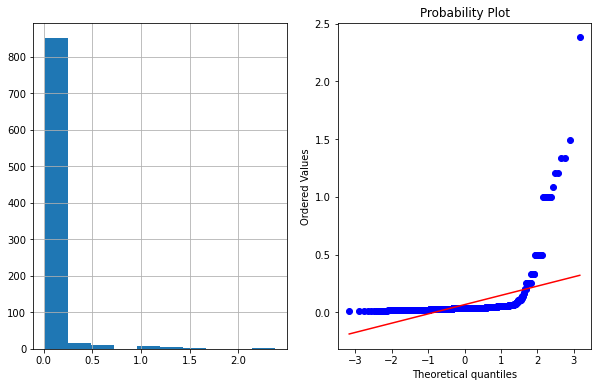

In [60]:
df['Age_reciprocal']=1/df.Age
plot_data(df,'Age_reciprocal')

### Square Root Transformation

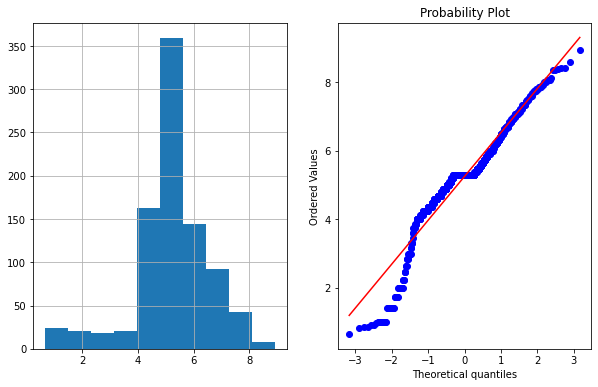

In [61]:
df['Age_sqaure']=df.Age**(1/2)
plot_data(df,'Age_sqaure')

### Exponential Transformation

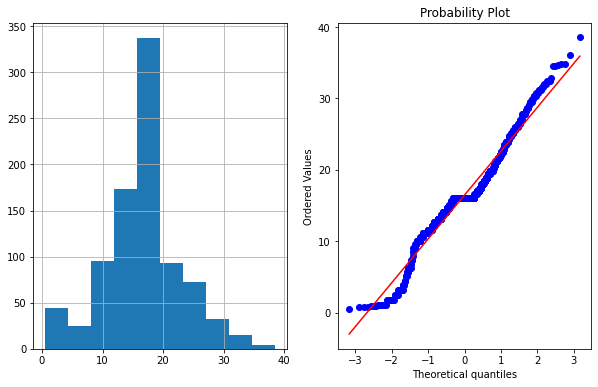

In [62]:
df['Age_exponential']=df.Age**(1/1.2)
plot_data(df,'Age_exponential')

### BoxCox Transformation
The Box-Cox transformation is defined as:

T(Y)=(Y exp(λ)−1)/λ

where Y is the response variable and λ is the transformation parameter. λ varies from -5 to 5. In the transformation, all values of λ are considered and the optimal value for a given variable is selected.

In [63]:
df['Age_Boxcox'],parameters=stat.boxcox(df['Age'])

In [64]:
print(parameters)

0.7964531473656952


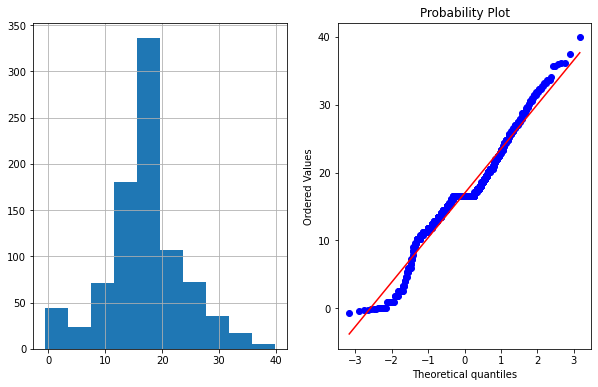

In [66]:
plot_data(df,'Age_Boxcox')

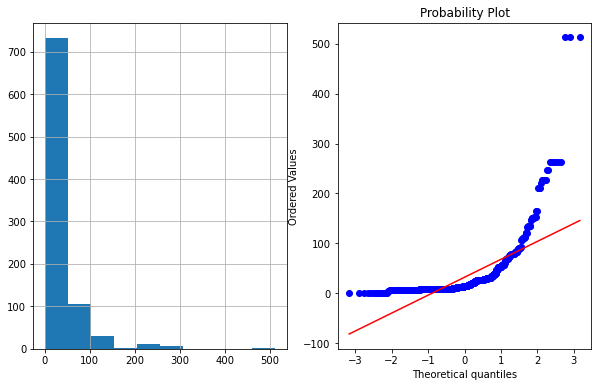

In [67]:
## Now see fro original fare variable
plot_data(df,'Fare')

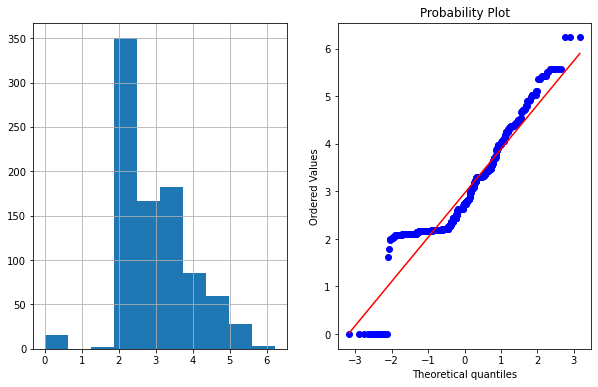

In [69]:
## we are using (log1p) method means adding 1 with log base
df['Fare_log']=np.log1p(df['Fare'])
plot_data(df,'Fare_log')

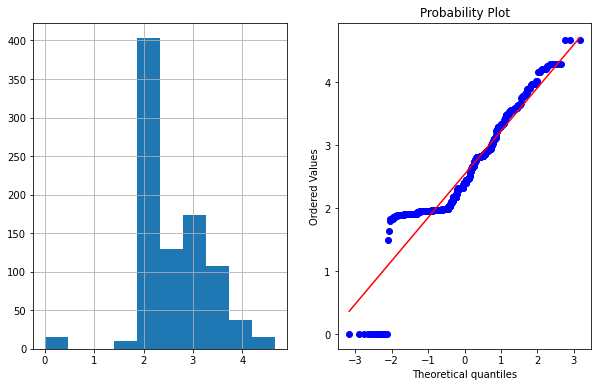

In [73]:
## Here adding one we are making data positive
df['Fare_Boxcox'],parameters=stat.boxcox(df['Fare']+1)
plot_data(df,'Fare_Boxcox')